In [63]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# import the necessary packages

In [64]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 150)

In [65]:
train = pd.read_csv("train.csv")
train.head()

test = pd.read_csv("test.csv")
test.head()

data = pd.concat([train, test]).reset_index(drop=True)
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Age                   float64
 2   Gender                object 
 3   Annual Income         float64
 4   Marital Status        object 
 5   Number of Dependents  float64
 6   Education Level       object 
 7   Occupation            object 
 8   Health Score          float64
 9   Location              object 
 10  Policy Type           object 
 11  Previous Claims       float64
 12  Vehicle Age           float64
 13  Credit Score          float64
 14  Insurance Duration    float64
 15  Policy Start Date     object 
 16  Customer Feedback     object 
 17  Smoking Status        object 
 18  Exercise Frequency    object 
 19  Property Type         object 
 20  Premium Amount        float64
dtypes: float64(9), int64(1), object(11)
memory usage: 320.4+ MB


In [67]:
data.isna().sum()

id                           0
Age                      31194
Gender                       0
Annual Income            74809
Marital Status           30865
Number of Dependents    182802
Education Level              0
Occupation              597200
Health Score            123525
Location                     0
Policy Type                  0
Previous Claims         606831
Vehicle Age                  9
Credit Score            229333
Insurance Duration           3
Policy Start Date            0
Customer Feedback       130100
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount          800000
dtype: int64

In [68]:
data_corr = pd.DataFrame(train)
data_corr = data_corr.dropna()

le = LabelEncoder()

for col in data_corr.select_dtypes(include='object').columns:
    data_corr[col] = le.fit_transform(data_corr[col])

data_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384004 entries, 0 to 1199990
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    384004 non-null  int64  
 1   Age                   384004 non-null  float64
 2   Gender                384004 non-null  int32  
 3   Annual Income         384004 non-null  float64
 4   Marital Status        384004 non-null  int32  
 5   Number of Dependents  384004 non-null  float64
 6   Education Level       384004 non-null  int32  
 7   Occupation            384004 non-null  int32  
 8   Health Score          384004 non-null  float64
 9   Location              384004 non-null  int32  
 10  Policy Type           384004 non-null  int32  
 11  Previous Claims       384004 non-null  float64
 12  Vehicle Age           384004 non-null  float64
 13  Credit Score          384004 non-null  float64
 14  Insurance Duration    384004 non-null  float64
 15  Poli

<Axes: >

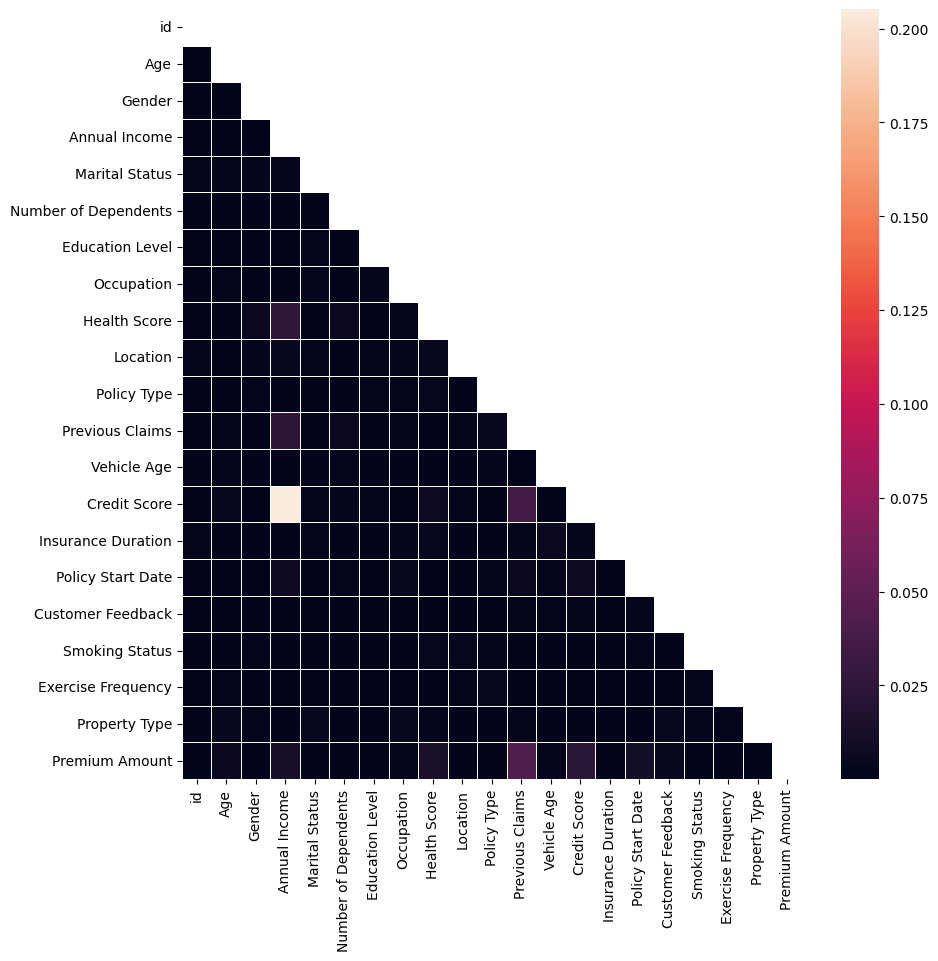

In [69]:
f, ax = plt.subplots(figsize=(10, 10))

corr = data_corr.corr().abs()
matrix_mask = np.triu(np.ones_like(corr)) # only show the upper triangular for the correlation matrix
sns.heatmap(corr, linewidths=.5, mask=matrix_mask)

In [70]:
data_corr = pd.DataFrame(test)
data_corr = data_corr.dropna()

le = LabelEncoder()

for col in data_corr.select_dtypes(include='object').columns:
    data_corr[col] = le.fit_transform(data_corr[col])

data_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255358 entries, 3 to 799994
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    255358 non-null  int64  
 1   Age                   255358 non-null  float64
 2   Gender                255358 non-null  int32  
 3   Annual Income         255358 non-null  float64
 4   Marital Status        255358 non-null  int32  
 5   Number of Dependents  255358 non-null  float64
 6   Education Level       255358 non-null  int32  
 7   Occupation            255358 non-null  int32  
 8   Health Score          255358 non-null  float64
 9   Location              255358 non-null  int32  
 10  Policy Type           255358 non-null  int32  
 11  Previous Claims       255358 non-null  float64
 12  Vehicle Age           255358 non-null  float64
 13  Credit Score          255358 non-null  float64
 14  Insurance Duration    255358 non-null  float64
 15  Polic

<Axes: >

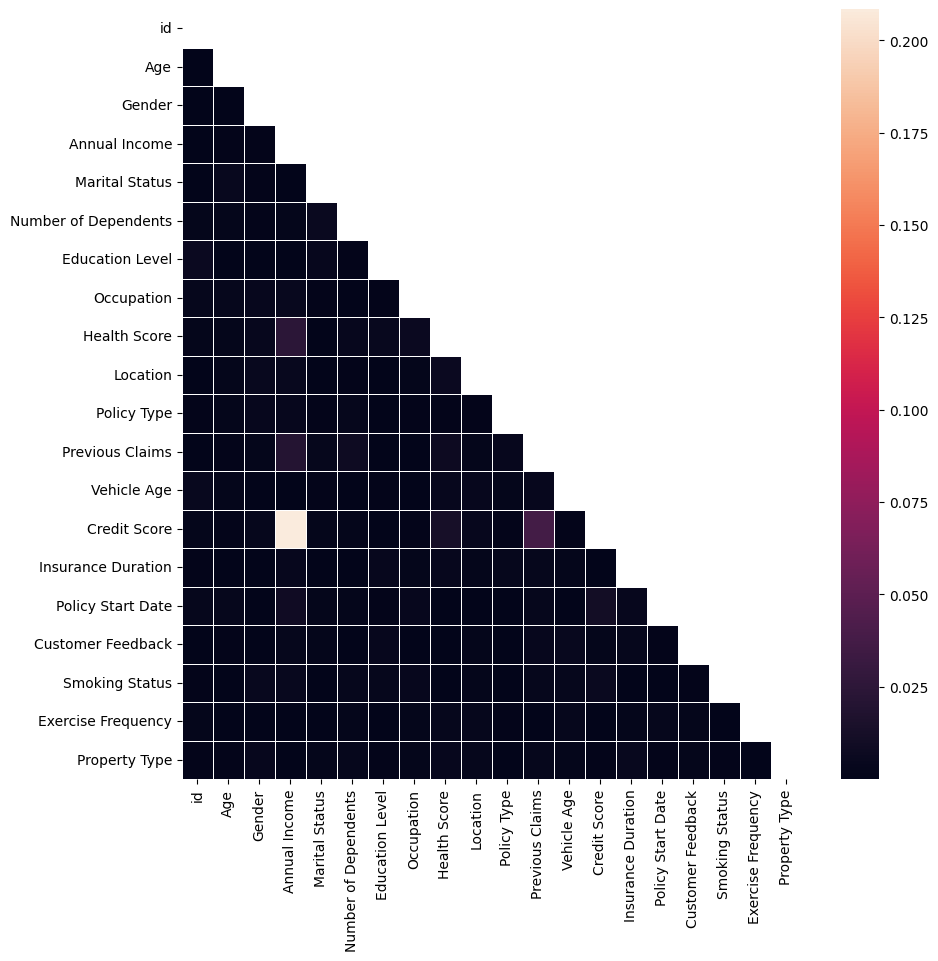

In [71]:
f, ax = plt.subplots(figsize=(10, 10))

corr = data_corr.corr().abs()
matrix_mask = np.triu(np.ones_like(corr)) # only show the upper triangular for the correlation matrix
sns.heatmap(corr, linewidths=.5, mask=matrix_mask)

In [72]:
data["Insurance Duration"] = data["Insurance Duration"].astype('category')

<Axes: xlabel='Marital Status', ylabel='count'>

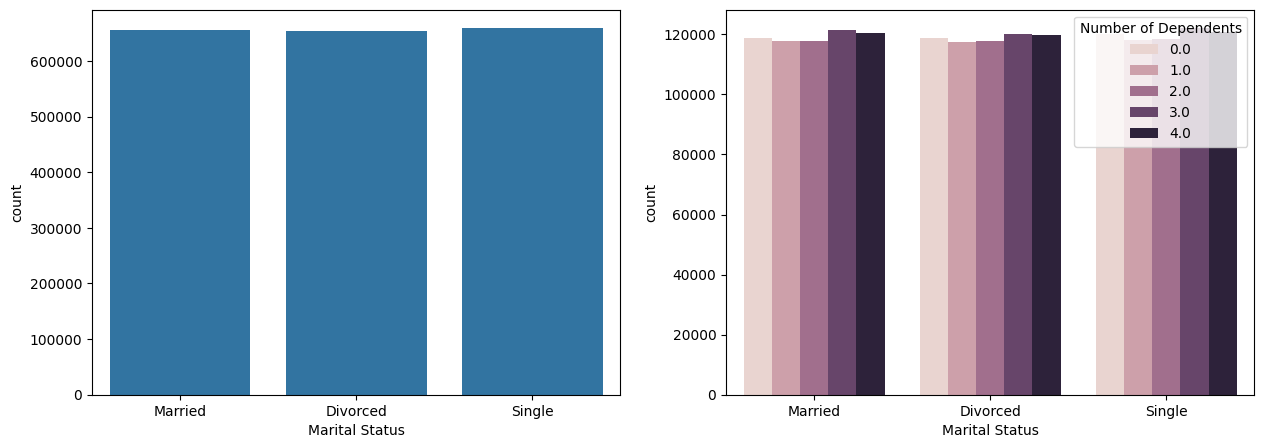

In [73]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))

sns.countplot(data,x="Marital Status",ax=axs[0])
sns.countplot(data, x="Marital Status", hue="Number of Dependents",ax=axs[1])

<Axes: xlabel='Marital Status', ylabel='count'>

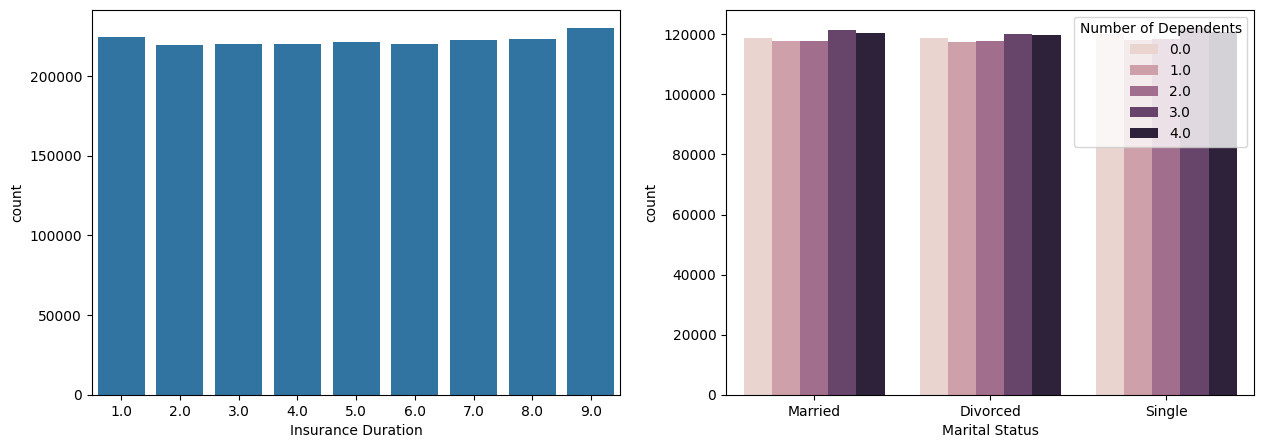

In [74]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))

sns.countplot(data,x="Insurance Duration",ax=axs[0])
sns.countplot(data, x="Marital Status", hue="Number of Dependents",ax=axs[1])

<Axes: xlabel='Education Level', ylabel='count'>

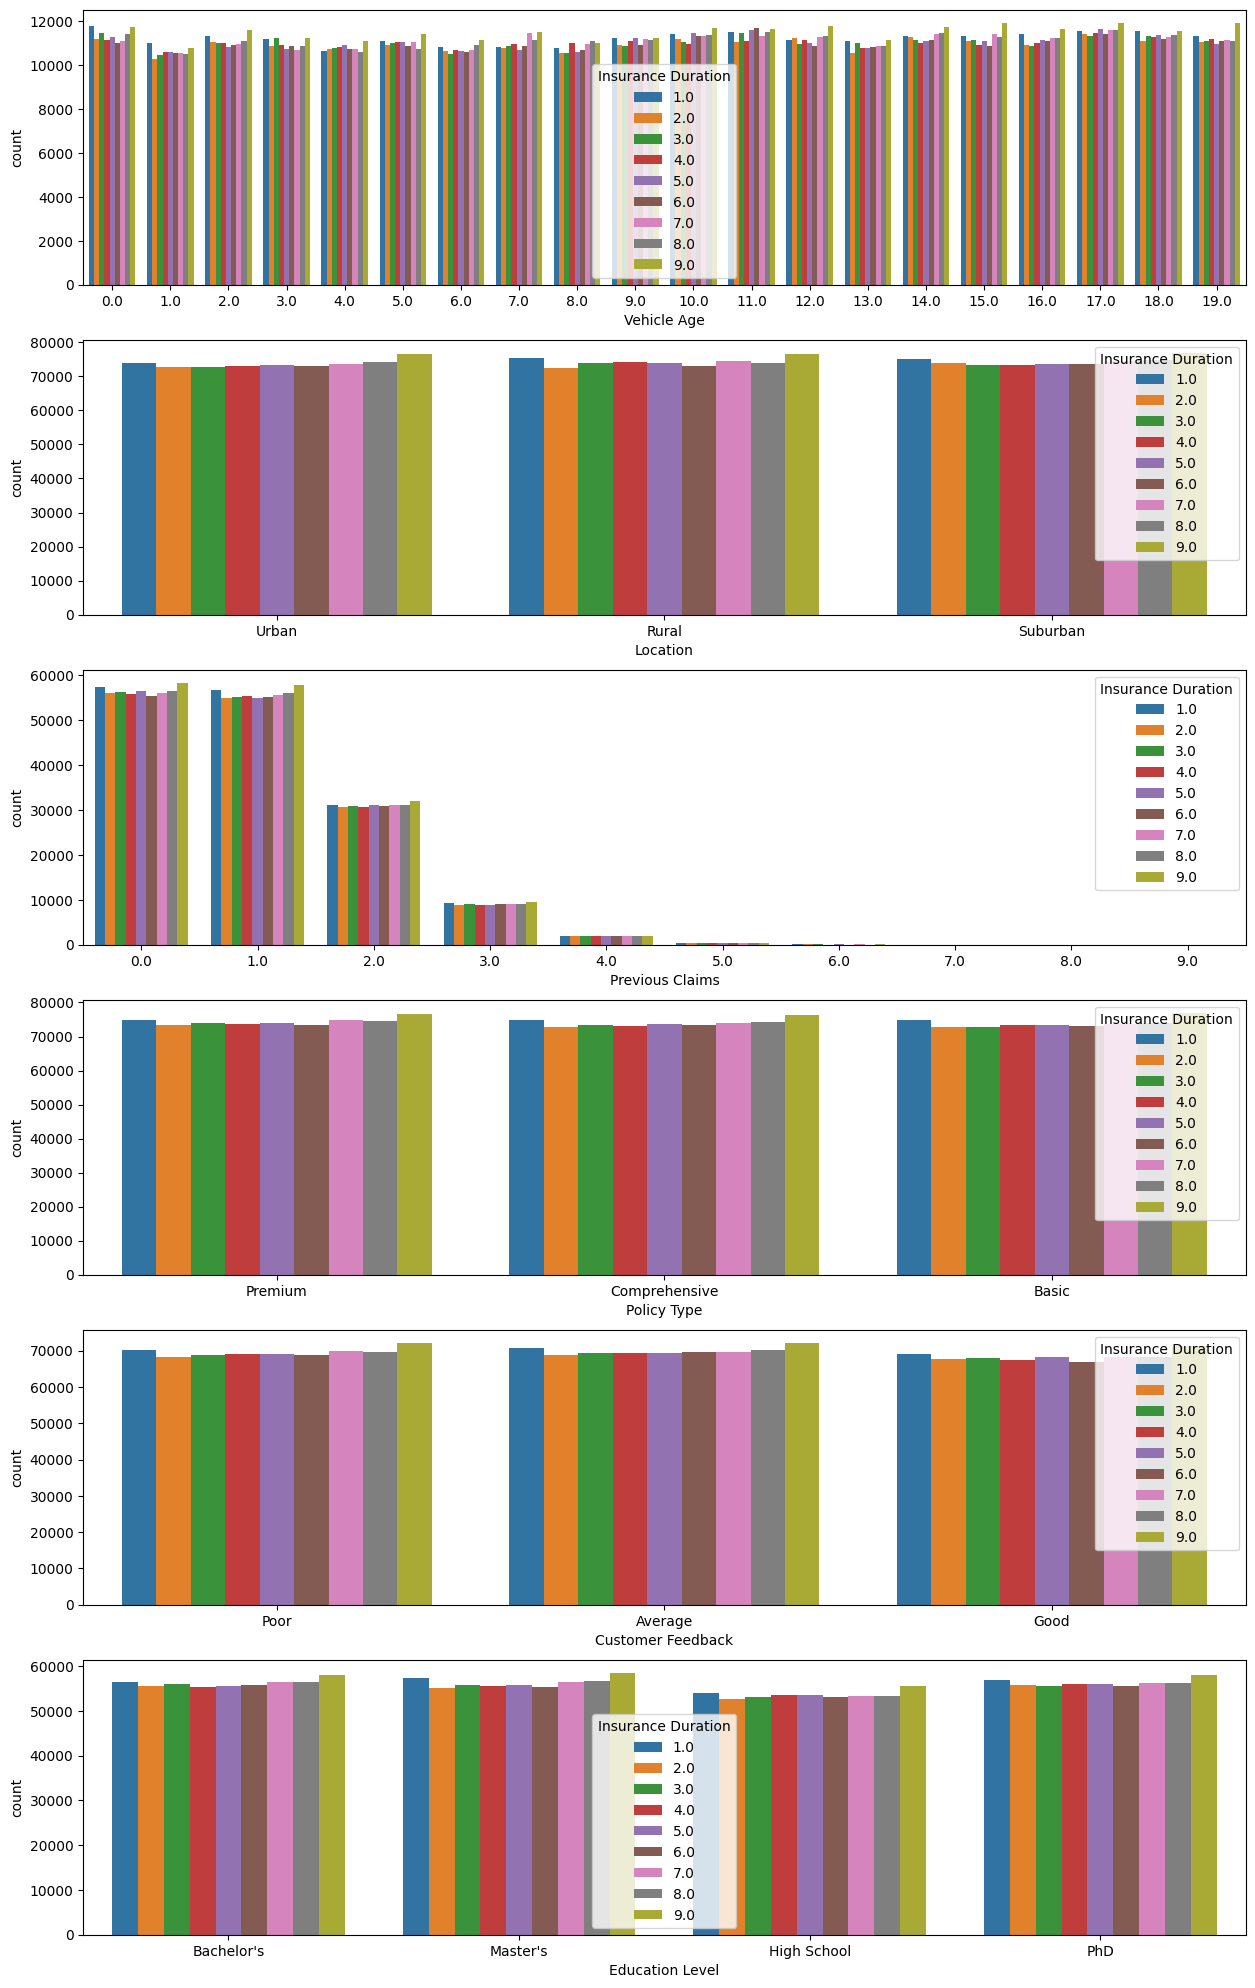

In [75]:
fig, axs = plt.subplots(nrows=6, figsize=(15,25))

sns.countplot(data,x="Vehicle Age",hue="Insurance Duration",ax=axs[0])
sns.countplot(data,x="Location",hue="Insurance Duration",ax=axs[1])
sns.countplot(data,x="Previous Claims",hue="Insurance Duration",ax=axs[2])
sns.countplot(data,x="Policy Type",hue="Insurance Duration",ax=axs[3])
sns.countplot(data,x="Customer Feedback",hue="Insurance Duration",ax=axs[4])
sns.countplot(data,x="Education Level",hue="Insurance Duration",ax=axs[5])

In [76]:
data[data['Insurance Duration'].isna()]

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
711358,711358,64.0,Male,30206.0,Married,3.0,Master's,Employed,49.551038,Suburban,Basic,0.0,18.0,581.0,NaN,2022-04-06 15:21:39.203442,Poor,Yes,Rarely,Apartment,1044.0
1827445,1827445,53.0,Male,5933.0,Married,3.0,Master's,NaN,25.162516,Rural,Basic,NaN,0.0,673.0,NaN,2023-02-10 15:21:39.199447,Poor,No,Weekly,House,NaN
1906315,1906315,23.0,Male,35357.0,Single,1.0,Master's,NaN,19.908571,Urban,Basic,2.0,14.0,481.0,NaN,2020-01-25 15:21:39.223390,Poor,No,Monthly,Apartment,NaN


<Axes: xlabel='Premium Amount', ylabel='Customer Feedback'>

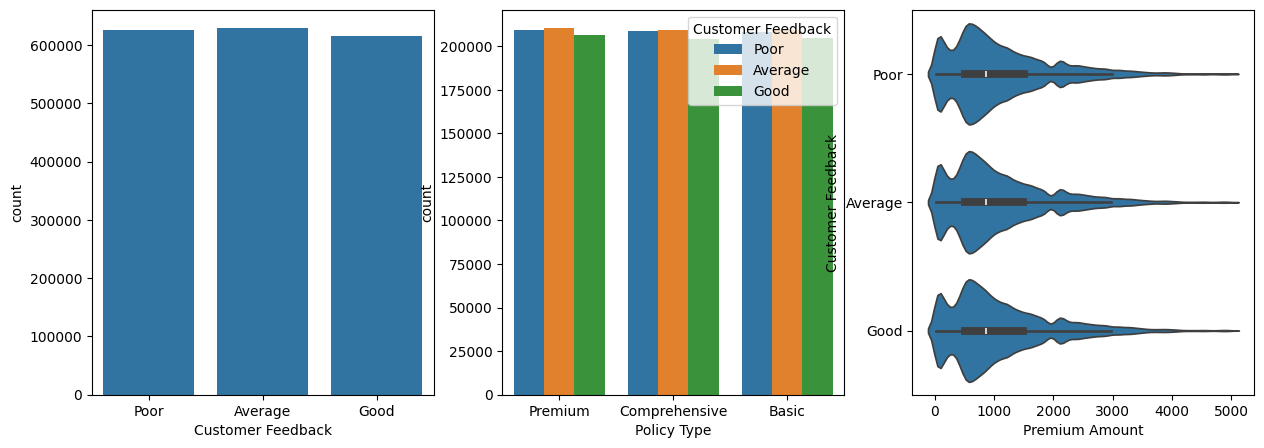

In [77]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.countplot(data,x="Customer Feedback",ax=axs[0])
sns.countplot(data,x="Policy Type",hue="Customer Feedback",ax=axs[1])
sns.violinplot(data,x="Premium Amount",y="Customer Feedback",ax=axs[2])

<Axes: xlabel='Customer Feedback', ylabel='count'>

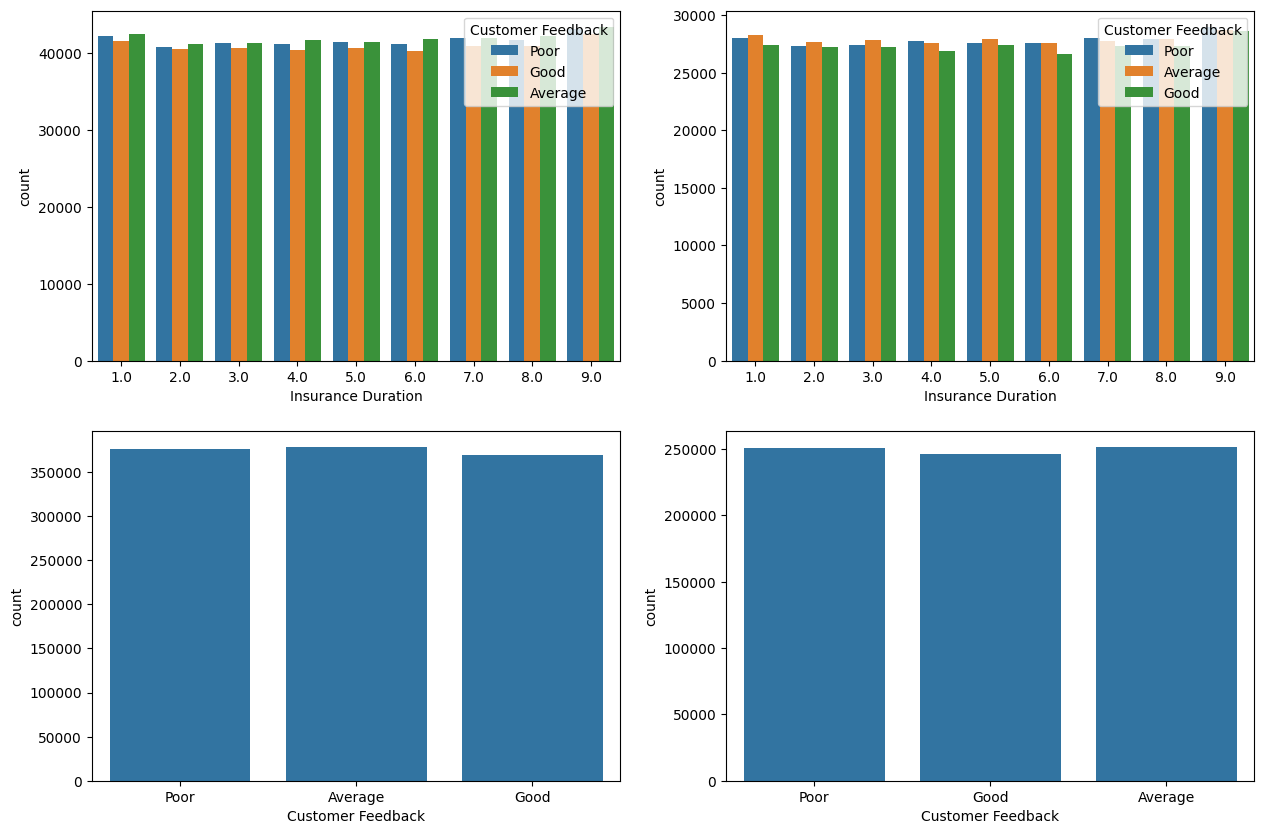

In [78]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,10)) 
sns.countplot(train,x="Insurance Duration",hue="Customer Feedback",ax=axs[0][0])
sns.countplot(test,x="Insurance Duration",hue="Customer Feedback",ax=axs[0][1])

sns.countplot(train,x="Customer Feedback",ax=axs[1][0])
sns.countplot(test,x="Customer Feedback",ax=axs[1][1])

<Axes: xlabel='Health Score', ylabel='Marital Status'>

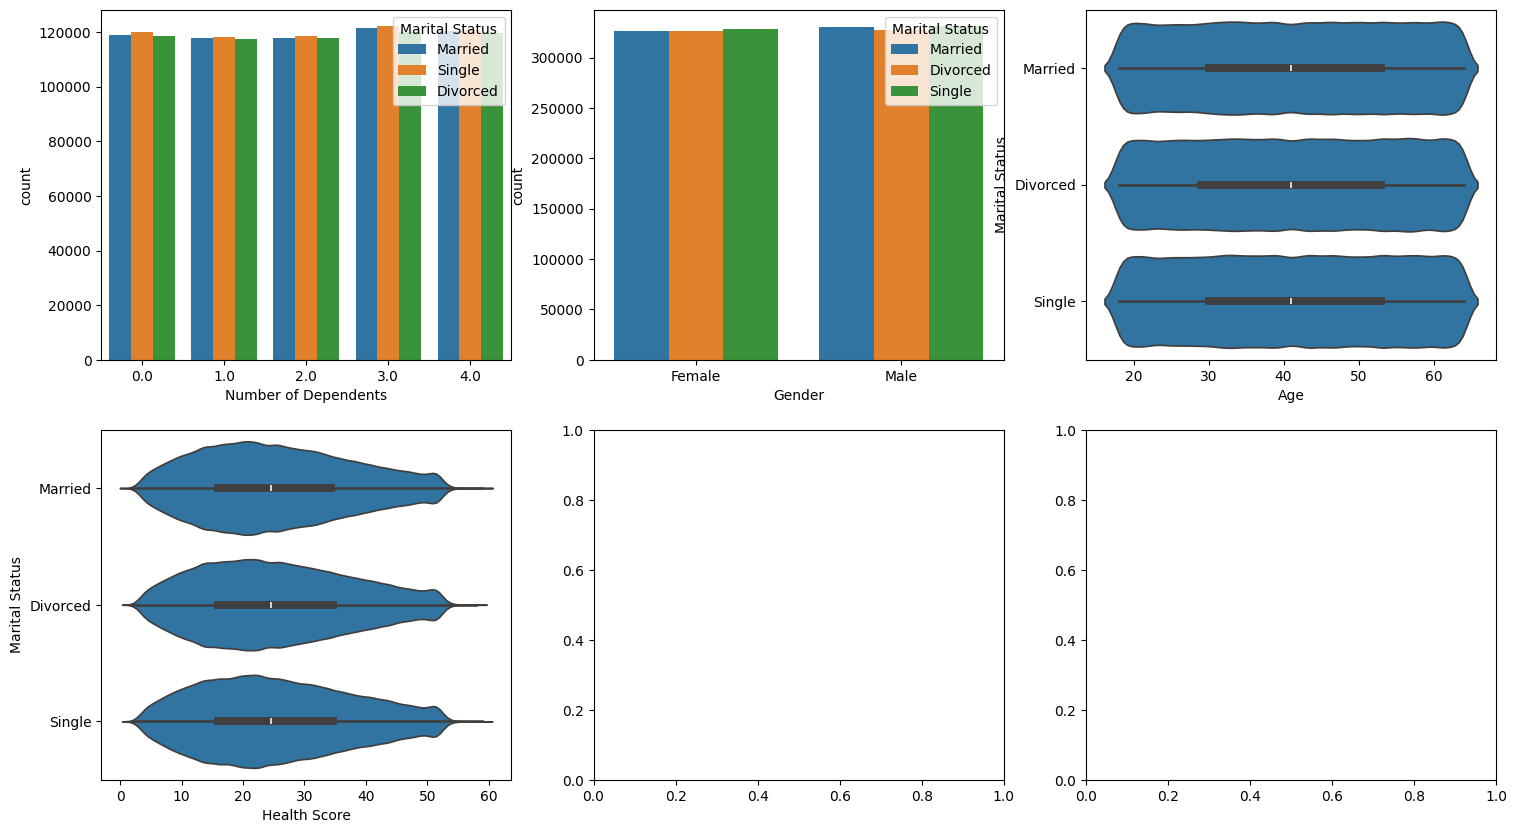

In [79]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(18,10))

sns.countplot(data,x="Number of Dependents",hue="Marital Status",ax=axs[0][0])
sns.countplot(data,x="Gender",hue="Marital Status",ax=axs[0][1])
sns.violinplot(data,x="Age",y="Marital Status",ax=axs[0][2])
sns.violinplot(data,x="Health Score",y="Marital Status",ax=axs[1][0])

<Axes: xlabel='Age', ylabel='Count'>

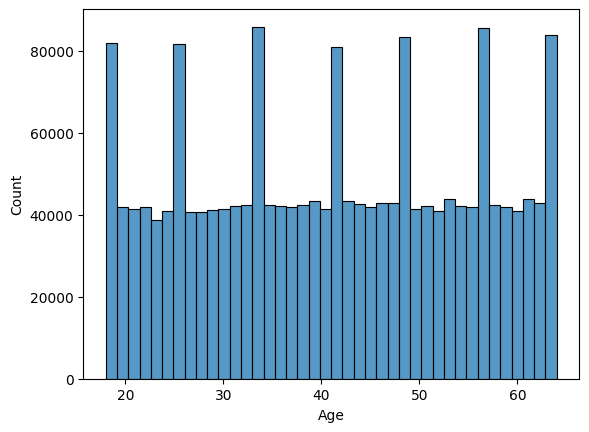

In [80]:
sns.histplot(data,x="Age",bins=40)

In [81]:
data[data["Age"]==25]

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
12,12,25.0,Female,23706.0,Single,4.0,Master's,Employed,4.090538,Urban,Comprehensive,2.0,19.0,NaN,2.0,2021-10-28 15:21:39.086123,Poor,Yes,Weekly,Apartment,703.0
34,34,25.0,Female,40887.0,Single,3.0,Bachelor's,NaN,17.283651,Suburban,Premium,NaN,5.0,695.0,2.0,2023-04-01 15:21:39.086123,Average,Yes,Monthly,Apartment,2152.0
149,149,25.0,Male,7073.0,Single,3.0,Master's,Employed,17.012323,Rural,Premium,NaN,19.0,686.0,6.0,2021-11-24 15:21:39.252145,Average,No,Daily,Condo,823.0
168,168,25.0,Male,7007.0,Divorced,2.0,Master's,NaN,22.451128,Suburban,Comprehensive,2.0,14.0,364.0,8.0,2022-08-01 15:21:39.187211,NaN,Yes,Weekly,Condo,868.0
209,209,25.0,Male,46184.0,Single,0.0,Bachelor's,Self-Employed,38.354963,Suburban,Basic,1.0,4.0,630.0,9.0,2020-01-29 15:21:39.194829,Average,Yes,Weekly,House,1333.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999914,1999914,25.0,Female,1793.0,Divorced,2.0,PhD,Unemployed,18.638451,Urban,Premium,0.0,9.0,398.0,5.0,2019-12-15 15:21:39.079128,Good,Yes,Weekly,House,NaN
1999960,1999960,25.0,Female,12071.0,Divorced,1.0,PhD,NaN,24.509999,Rural,Basic,2.0,1.0,439.0,6.0,2021-12-10 15:21:39.130190,Average,No,Rarely,Condo,NaN
1999977,1999977,25.0,Female,43989.0,Married,2.0,PhD,Unemployed,8.723609,Urban,Comprehensive,NaN,13.0,519.0,2.0,2021-07-03 15:21:39.281787,Good,Yes,Monthly,Condo,NaN
1999990,1999990,25.0,Male,33991.0,Divorced,2.0,Master's,NaN,5.081818,Suburban,Basic,0.0,12.0,NaN,4.0,2023-10-03 15:21:39.102694,Average,Yes,Monthly,Condo,NaN


<Axes: xlabel='Annual Income', ylabel='Count'>

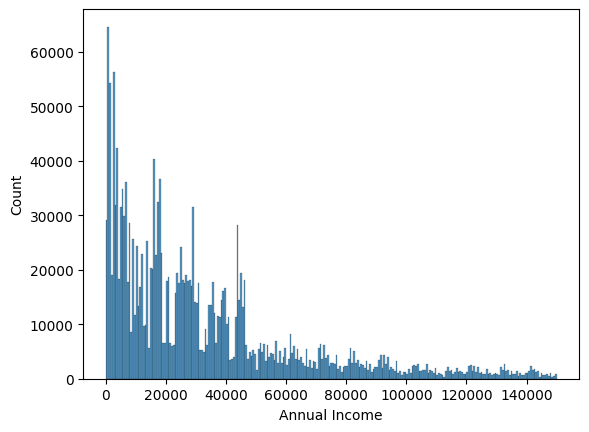

In [82]:
sns.histplot(data,x="Annual Income")

<Axes: xlabel='Annual Income'>

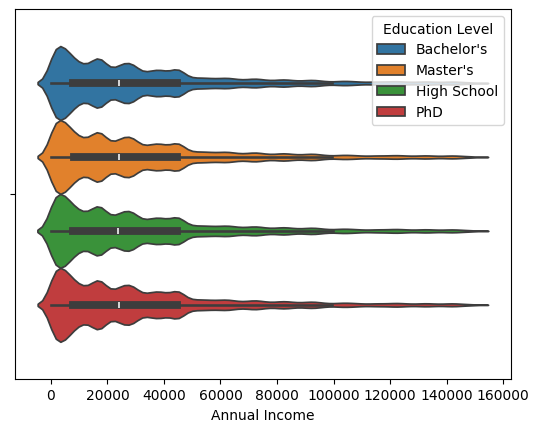

In [83]:
sns.violinplot(data,x="Annual Income",hue="Education Level")

<Axes: xlabel='Annual Income'>

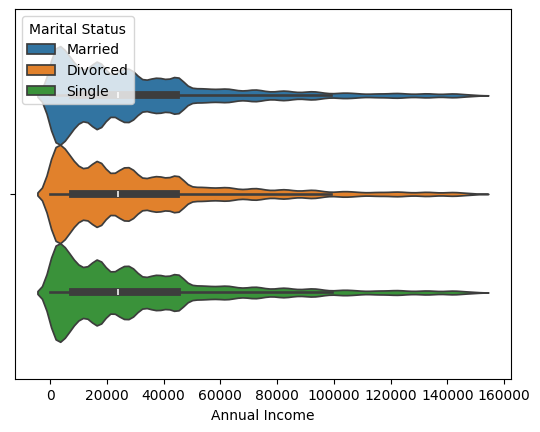

In [84]:
sns.violinplot(data,x="Annual Income",hue="Marital Status")

<Axes: xlabel='Annual Income'>

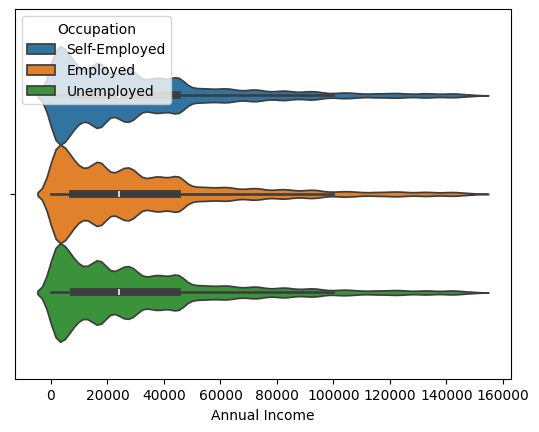

In [85]:
sns.violinplot(data,x="Annual Income",hue="Occupation")

<Axes: xlabel='Annual Income'>

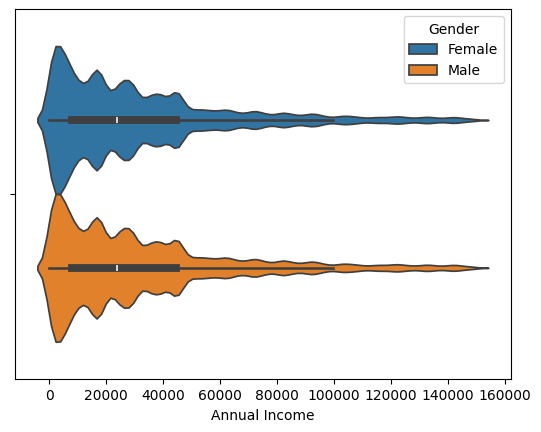

In [86]:
sns.violinplot(data,x="Annual Income",hue="Gender")

<Axes: xlabel='Credit Score', ylabel='Annual Income'>

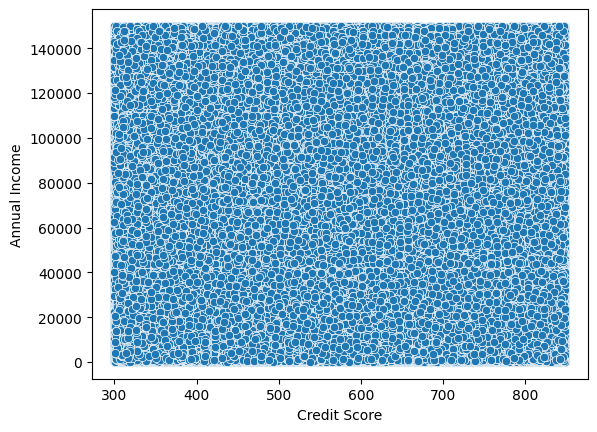

In [87]:
sns.scatterplot(data,x="Credit Score",y="Annual Income")

<Axes: xlabel='Occupation', ylabel='count'>

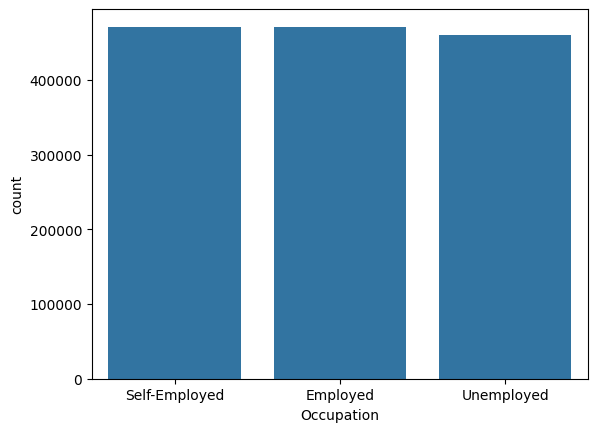

In [88]:
sns.countplot(data,x="Occupation")

<Axes: xlabel='Education Level', ylabel='count'>

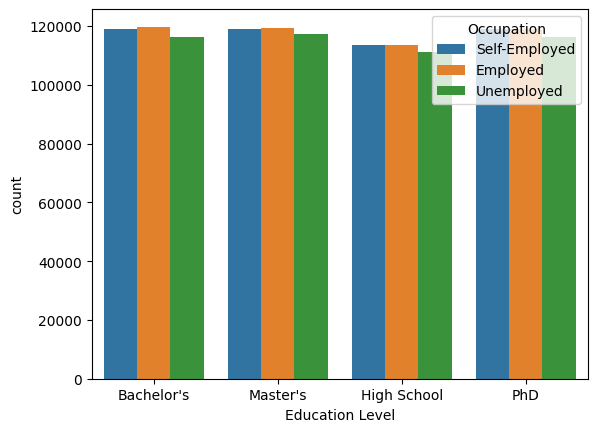

In [89]:
sns.countplot(data,x="Education Level",hue="Occupation")

<Axes: xlabel='Health Score', ylabel='Count'>

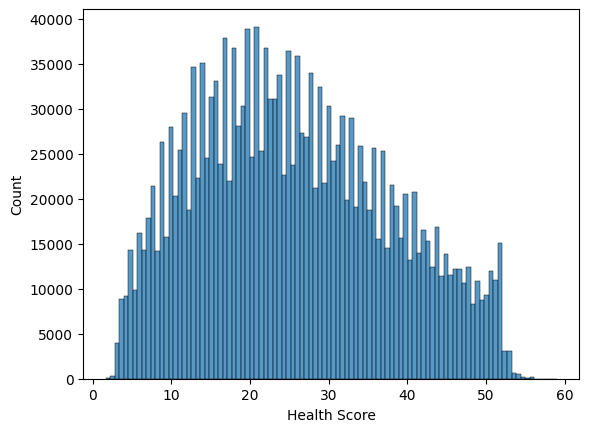

In [90]:
sns.histplot(data,x="Health Score",bins=100)

<Axes: xlabel='Credit Score', ylabel='Count'>

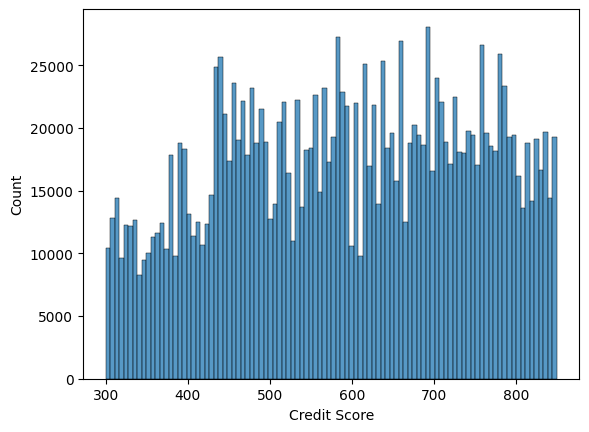

In [91]:
sns.histplot(data,x="Credit Score",bins=100)

<Axes: xlabel='Previous Claims', ylabel='Credit Score'>

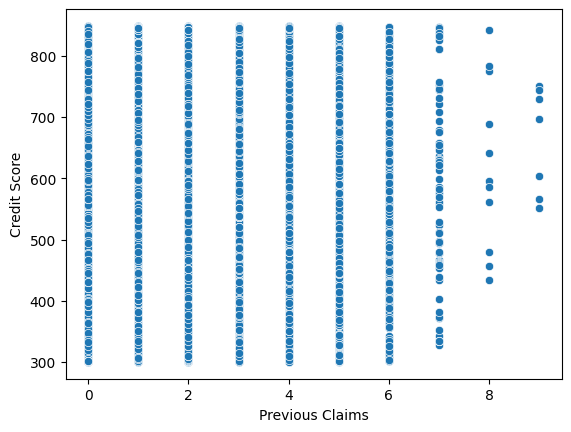

In [92]:
sns.scatterplot(data,x="Previous Claims",y="Credit Score")

<Axes: xlabel='Vehicle Age', ylabel='Count'>

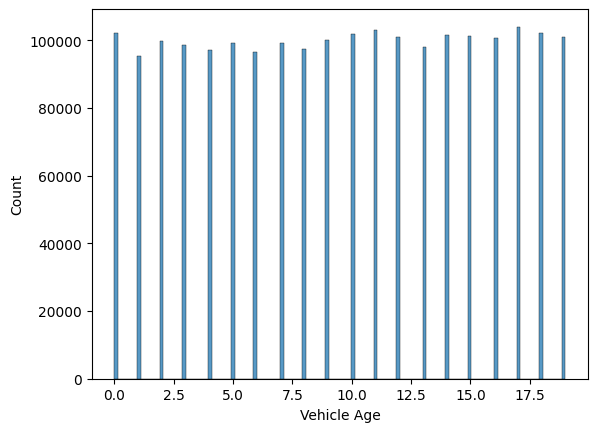

In [93]:
sns.histplot(data,x="Vehicle Age")

<Axes: xlabel='Health Score', ylabel='Annual Income'>

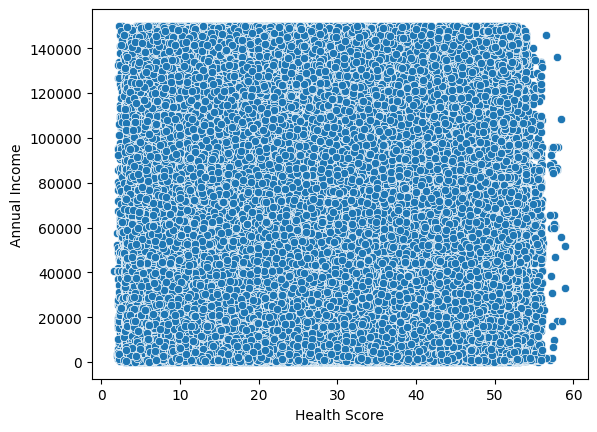

In [95]:
sns.scatterplot(data,x="Health Score",y="Annual Income")